In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/jonzimmerman/Desktop/Data Projects/Airport Accessibility Project'

In [2]:
#Load in Dataset #1: Routes
routes=pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",
            sep=',', header=None, names=["Airline","AirlineID","IATA","SourceAP_ID","DestinationAirport","DestAP_ID","Codeshare","Stops","Equipment"])
routes.head(5)

,Airline,AirlineID,IATA,SourceAP_ID,DestinationAirport,DestAP_ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [3]:
#Load in Dataset #1: Airports
airports=pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat",
            sep=',', header=None, names=["AirportID","Name","City","Country","IATA","ICAO","Latitude","Longitude","Altitude","Timezone","DST","TzDatabaseTz","Type","Source"])
airports.head(5)

,AirportID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TzDatabaseTz,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [4]:
airports.shape

(12668, 14)

In [5]:
routes.shape

(67663, 9)

In [6]:
#Join datasets on IATA codes
airjoin=pd.merge(routes,airports,on="IATA",how="left")

In [7]:
airjoin.shape

(67663, 22)

In [8]:
airjoin.head(5)

,Airline,AirlineID,IATA,SourceAP_ID,DestinationAirport,DestAP_ID,Codeshare,Stops,Equipment,AirportID,...,Country,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TzDatabaseTz,Type,Source
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,2965.0,...,Russia,URSS,43.449902,39.956600,89.0,3,N,Europe/Moscow,airport,OurAirports
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,2966.0,...,Russia,URWA,46.283298,48.006302,-65.0,4,N,Europe/Samara,airport,OurAirports
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,2966.0,...,Russia,URWA,46.283298,48.006302,-65.0,4,N,Europe/Samara,airport,OurAirports
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,2968.0,...,Russia,USCC,55.305801,61.503300,769.0,5,N,Asia/Yekaterinburg,airport,OurAirports
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,2968.0,...,Russia,USCC,55.305801,61.503300,769.0,5,N,Asia/Yekaterinburg,airport,OurAirports


In [9]:
#Create UniqueID variable: IATA_DestIATA
airjoin['Unique_ID']=airjoin['IATA']+'_'+airjoin['DestinationAirport']

In [10]:
airjoin.shape

(67663, 23)

In [11]:
airjoin.head(5)

,Airline,AirlineID,IATA,SourceAP_ID,DestinationAirport,DestAP_ID,Codeshare,Stops,Equipment,AirportID,...,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TzDatabaseTz,Type,Source,Unique_ID
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,2965.0,...,URSS,43.449902,39.956600,89.0,3,N,Europe/Moscow,airport,OurAirports,AER_KZN
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,2966.0,...,URWA,46.283298,48.006302,-65.0,4,N,Europe/Samara,airport,OurAirports,ASF_KZN
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,2966.0,...,URWA,46.283298,48.006302,-65.0,4,N,Europe/Samara,airport,OurAirports,ASF_MRV
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,2968.0,...,USCC,55.305801,61.503300,769.0,5,N,Asia/Yekaterinburg,airport,OurAirports,CEK_KZN
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,2968.0,...,USCC,55.305801,61.503300,769.0,5,N,Asia/Yekaterinburg,airport,OurAirports,CEK_OVB


In [12]:
#Remove unnecessary columns 
airjoin=airjoin.drop(['Airline', 'AirlineID','SourceAP_ID','DestAP_ID','Codeshare','Stops','Equipment', 'ICAO','Altitude','Timezone','DST','AirportID'], axis=1)
airjoin.head(5)

,IATA,DestinationAirport,Name,City,Country,Latitude,Longitude,TzDatabaseTz,Type,Source,Unique_ID
0,AER,KZN,Sochi International Airport,Sochi,Russia,43.449902,39.956600,Europe/Moscow,airport,OurAirports,AER_KZN
1,ASF,KZN,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_KZN
2,ASF,MRV,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_MRV
3,CEK,KZN,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_KZN
4,CEK,OVB,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_OVB


In [13]:
#Remove duplicates by UniqueID
airjoin_nodups=airjoin.drop_duplicates(subset='Unique_ID', keep="first")

In [14]:
airjoin_nodups.shape

(37595, 11)

In [15]:
fullair=airjoin_nodups

In [16]:
fullair.shape

(37595, 11)

In [17]:
fullair.head(5)

,IATA,DestinationAirport,Name,City,Country,Latitude,Longitude,TzDatabaseTz,Type,Source,Unique_ID
0,AER,KZN,Sochi International Airport,Sochi,Russia,43.449902,39.956600,Europe/Moscow,airport,OurAirports,AER_KZN
1,ASF,KZN,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_KZN
2,ASF,MRV,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_MRV
3,CEK,KZN,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_KZN
4,CEK,OVB,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_OVB


In [18]:
test = fullair.groupby(['IATA']).count()

In [19]:
test1 = test[['DestinationAirport']]


In [20]:
test1

,DestinationAirport
IATA,
AAE,7
AAL,13
AAN,2
AAQ,3
AAR,8
...,...
ZUH,30
ZUM,2
ZVK,3


In [21]:
test1.columns = ['Origin_Airport_Count']


In [22]:
test1

,Origin_Airport_Count
IATA,
AAE,7
AAL,13
AAN,2
AAQ,3
AAR,8
...,...
ZUH,30
ZUM,2
ZVK,3


In [23]:
fullair2=pd.merge(fullair,test1,on="IATA",how="left")

In [24]:
fullair2.shape

(37595, 12)

In [25]:
fullair2.head(5)

,IATA,DestinationAirport,Name,City,Country,Latitude,Longitude,TzDatabaseTz,Type,Source,Unique_ID,Origin_Airport_Count
0,AER,KZN,Sochi International Airport,Sochi,Russia,43.449902,39.956600,Europe/Moscow,airport,OurAirports,AER_KZN,17
1,ASF,KZN,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_KZN,7
2,ASF,MRV,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_MRV,7
3,CEK,KZN,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_KZN,14
4,CEK,OVB,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_OVB,14


In [26]:
test_country = fullair2.groupby(['Country']).count()
test_country1 = test_country[['DestinationAirport']]
test_country1.columns = ['Country_Count']
fullair3=pd.merge(fullair2,test_country1,on="Country",how="left")

In [27]:
fullair3.head(5)

,IATA,DestinationAirport,Name,City,Country,Latitude,Longitude,TzDatabaseTz,Type,Source,Unique_ID,Origin_Airport_Count,Country_Count
0,AER,KZN,Sochi International Airport,Sochi,Russia,43.449902,39.956600,Europe/Moscow,airport,OurAirports,AER_KZN,17,1295.0
1,ASF,KZN,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_KZN,7,1295.0
2,ASF,MRV,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_MRV,7,1295.0
3,CEK,KZN,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_KZN,14,1295.0
4,CEK,OVB,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_OVB,14,1295.0


In [28]:
fullair3.shape

(37595, 13)

In [29]:
fullair3['Region'] = fullair3['TzDatabaseTz'].str.split('/').str[0]


In [30]:
fullair3.shape

(37595, 14)

In [31]:
fullair3.head(5)

,IATA,DestinationAirport,Name,City,Country,Latitude,Longitude,TzDatabaseTz,Type,Source,Unique_ID,Origin_Airport_Count,Country_Count,Region
0,AER,KZN,Sochi International Airport,Sochi,Russia,43.449902,39.956600,Europe/Moscow,airport,OurAirports,AER_KZN,17,1295.0,Europe
1,ASF,KZN,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_KZN,7,1295.0,Europe
2,ASF,MRV,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_MRV,7,1295.0,Europe
3,CEK,KZN,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_KZN,14,1295.0,Asia
4,CEK,OVB,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_OVB,14,1295.0,Asia


In [32]:
test_region = fullair3.groupby(['Region']).count()
test_region1 = test_region[['DestinationAirport']]
test_region1.columns = ['Region_Count']
fullair4=pd.merge(fullair3,test_region1,on="Region",how="left")

In [33]:
fullair4.shape

(37595, 15)

In [34]:
fullair4.head(5)

,IATA,DestinationAirport,Name,City,Country,Latitude,Longitude,TzDatabaseTz,Type,Source,Unique_ID,Origin_Airport_Count,Country_Count,Region,Region_Count
0,AER,KZN,Sochi International Airport,Sochi,Russia,43.449902,39.956600,Europe/Moscow,airport,OurAirports,AER_KZN,17,1295.0,Europe,12302.0
1,ASF,KZN,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_KZN,7,1295.0,Europe,12302.0
2,ASF,MRV,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Europe/Samara,airport,OurAirports,ASF_MRV,7,1295.0,Europe,12302.0
3,CEK,KZN,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_KZN,14,1295.0,Asia,9718.0
4,CEK,OVB,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Asia/Yekaterinburg,airport,OurAirports,CEK_OVB,14,1295.0,Asia,9718.0


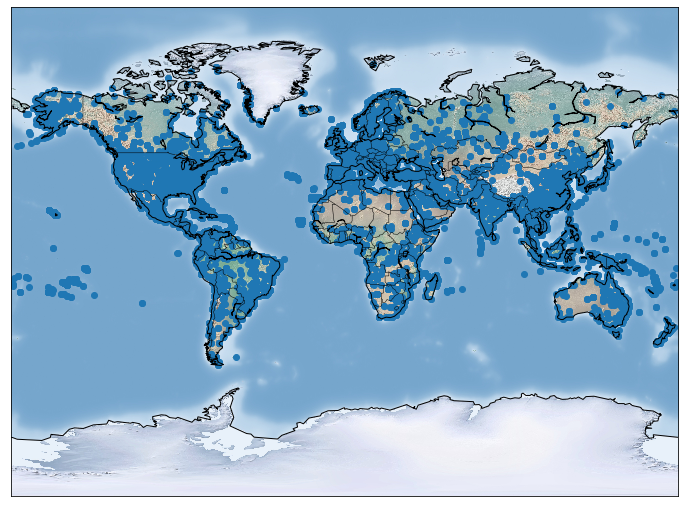

In [65]:
import warnings
warnings.filterwarnings('ignore')


from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,9))
m=Basemap(projection='mill',
         llcrnrlat=-90,
         urcrnrlat=90,
         llcrnrlon=-180,
         urcrnrlon=180,
         resolution='c')

m.drawcoastlines()
m.drawcountries()
#m.drawstates(color='red')
#m.drawrivers(color='blue')
#m.drawmapboundary(color='pink',linewidth=10,fill_color='aqua')
#m.fillcontinents(color='lightgreen',lake_color='aqua')

#Comment all other draw functions out and use these for satellite views 
#m.etopo()
#m.bluemarble()
m.shadedrelief()


ap_lat_y=fullair4['Latitude'].tolist()
ap_lon_x=fullair4['Longitude'].tolist()

m.scatter(ap_lon_x,ap_lat_y,latlon=True)

plt.show()

In [77]:
USA=fullair4.loc[fullair4.Country=="United States"]

In [79]:
USA.head(5)

,IATA,DestinationAirport,Name,City,Country,Latitude,Longitude,TzDatabaseTz,Type,Source,Unique_ID,Origin_Airport_Count,Country_Count,Region,Region_Count
168,ADQ,AOS,Kodiak Airport,Kodiak,United States,57.75,-152.494003,America/Anchorage,airport,OurAirports,ADQ_AOS,8,6677.0,America,11056.0
169,ADQ,KKB,Kodiak Airport,Kodiak,United States,57.75,-152.494003,America/Anchorage,airport,OurAirports,ADQ_KKB,8,6677.0,America,11056.0
170,ADQ,KLN,Kodiak Airport,Kodiak,United States,57.75,-152.494003,America/Anchorage,airport,OurAirports,ADQ_KLN,8,6677.0,America,11056.0
171,ADQ,KOZ,Kodiak Airport,Kodiak,United States,57.75,-152.494003,America/Anchorage,airport,OurAirports,ADQ_KOZ,8,6677.0,America,11056.0
172,ADQ,OLH,Kodiak Airport,Kodiak,United States,57.75,-152.494003,America/Anchorage,airport,OurAirports,ADQ_OLH,8,6677.0,America,11056.0


In [80]:
USA.shape

(6677, 15)

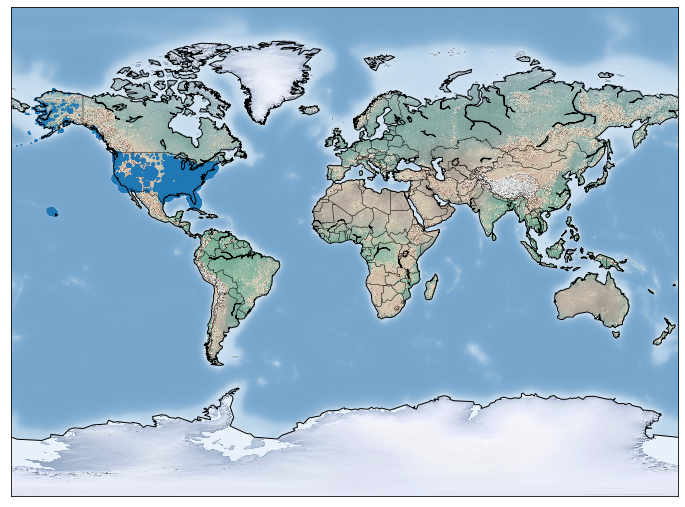

In [87]:
import warnings
warnings.filterwarnings('ignore')


from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,9))
m=Basemap(projection='mill',
         llcrnrlat=-90,
         urcrnrlat=90,
         llcrnrlon=-180,
         urcrnrlon=180,
         resolution='c')

m.drawcoastlines()
m.drawcountries()
#m.drawstates(color='red')
#m.drawrivers(color='blue')
#m.drawmapboundary(color='pink',linewidth=10,fill_color='aqua')
#m.fillcontinents(color='lightgreen',lake_color='aqua')

#Comment all other draw functions out and use these for satellite views 
#m.etopo()
#m.bluemarble()
m.shadedrelief()


ap_lat_y=USA['Latitude'].tolist()
ap_lon_x=USA['Longitude'].tolist()

m.scatter(ap_lon_x,ap_lat_y,latlon=True,s=USA['Origin_Airport_Count'].tolist())

plt.show()